<a href="https://colab.research.google.com/github/adalbertii/phyton-binder/blob/main/wmi_keras_linear_regression_one_neuron_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Educational Friday: 21.04.2023


---
Developed by Wojciech Michalski


---



Construction of neural networks - regresion model case

Using the Keras library



In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

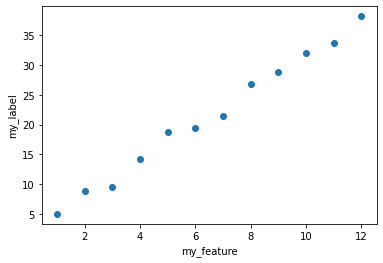

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
 # Label the axes.
 
plt.xlabel("my_feature")
plt.ylabel("my_label")
# Plot the feature values vs. label values.
plt.scatter(my_feature, my_label)


In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

In [ ]:
"""Create and compile a simple linear regression model."""
# Most simple tf.keras models are sequential. 
# A sequential model contains one or more layers.
model = tf.keras.models.Sequential()

# Describe the topography of the model.
# The topography of a simple linear regression model
# is a single node in a single layer. 
model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

# Compile the model topography into code that 
# TensorFlow can efficiently execute. Configure 
# training to minimize the model's mean squared error. 
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  

In [ ]:
# Feed the feature values and the label values to the 
# model. The model will train for the specified number 
# of epochs, gradually learning how the feature values
# relate to the label values. 
history = model.fit(x=my_feature,
                      y=my_label,
                      batch_size=my_batch_size,
                      epochs=epochs)
model.summary()

# Gather the trained model's weight and bias.
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]

# The list of epochs is stored separately from the 
# rest of history.
epochs = history.epoch
  
# Gather the history (a snapshot) of each epoch.
hist = pd.DataFrame(history.history)

# Specifically gather the model's root mean 
# squared error at each epoch. 
rmse = hist["root_mean_squared_error"]


Epoch 1/10
1/1 [==============================] - 1s 551ms/step - loss: 914.8962 - root_mean_squared_error: 30.2473
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 899.1818 - root_mean_squared_error: 29.9864
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 887.9131 - root_mean_squared_error: 29.7979
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 878.5556 - root_mean_squared_error: 29.6404
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 870.3058 - root_mean_squared_error: 29.5009
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 862.7916 - root_mean_squared_error: 29.3733
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 855.8054 - root_mean_squared_error: 29.2542
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 849.2184 - root_mean_squared_error: 29.1414
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 842.9444

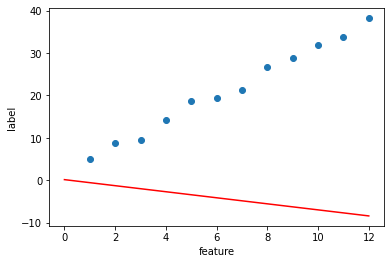

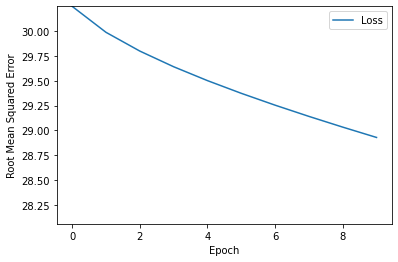

In [ ]:
# Label the axes.
plt.xlabel("feature")
plt.ylabel("label")

  # Plot the feature values vs. label values.
plt.scatter(my_feature, my_label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
x0 = 0
y0 = trained_bias
x1 = my_feature[-1]
y1 = trained_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
plt.show()

"""Plot the loss curve, which shows loss vs. epoch."""

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

plt.plot(epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min()*0.97, rmse.max()])
plt.show()

In [ ]:
learning_rate=0.01
epochs=10
my_batch_size=12

In [ ]:
learning_rate=0.01
epochs= 50   # Replace ? with an integer.
my_batch_size=12


In [ ]:
learning_rate=0.01
epochs=450
my_batch_size=12

In [ ]:
learning_rate=0.05
epochs=25
my_batch_size=1 # Wow, a batch size of 1 works!


A few rules:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.

If the training loss does not converge, train for more epochs.

If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.

If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.

Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.

For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.
